In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from datetime import datetime, timedelta
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_score
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("/Users/fasilck/Downloads/train 2.csv")
df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
df.describe()

store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000

In [5]:
df.shape,df.tail()

((913000, 4),
               date  store  item  sales
 912995  2017-12-27     10    50     63
 912996  2017-12-28     10    50     59
 912997  2017-12-29     10    50     74
 912998  2017-12-30     10    50     62
 912999  2017-12-31     10    50     82)

checking for missing values

In [6]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

checking for duplicates

In [9]:
df.duplicated().sum()

0

In [ ]:
df["item"].nunique()

50

In [ ]:
df["sales"].nunique()

213

In [10]:
df["date"].nunique()

1826

In [11]:
q1=df["sales"].quantile(0.25)
q3=df["sales"].quantile(0.75)
iqr=q3-q1

In [12]:
iqr

40.0

In [13]:
lower_threshold,upper_threshold=q1-1.5*iqr,q3+1.5*iqr

In [15]:
lower_threshold,upper_threshold

(-30.0, 130.0)

#####sales column is having outlier since the max value is 231 which is greater than upper threshold.
#####Let's keep the outliers since they are valid.Bcuz sales may be high in some seasons.

#EXPLORATORY DATA ANALYSIS[EDA]

### PLOTTING OVERALL SALES PATTERN

In [10]:
df_1=pd.DataFrame(df.groupby("date")["sales"].sum())

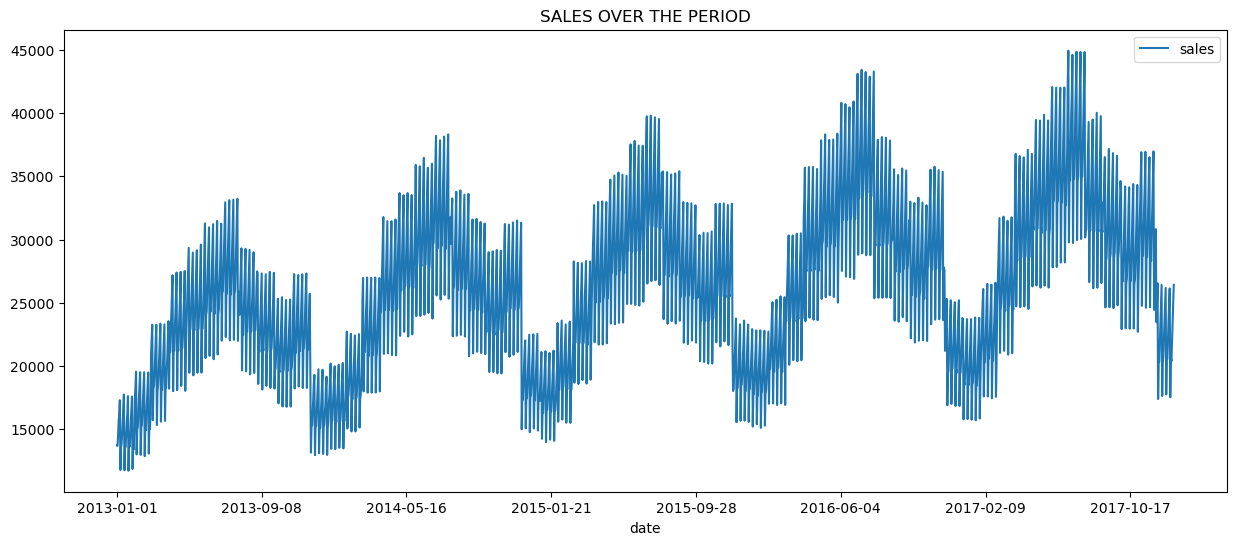

In [6]:
df_new=df.groupby("date")["sales"].sum().plot(figsize=(15,6),title="SALES OVER THE PERIOD",legend="sales")

####from the above graph we can observe  yearly seasonality and  slightly increasing trend for all the items over the years.

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


### PLOTTING WEEKLY SALES

Text(0, 0.5, 'Sales')

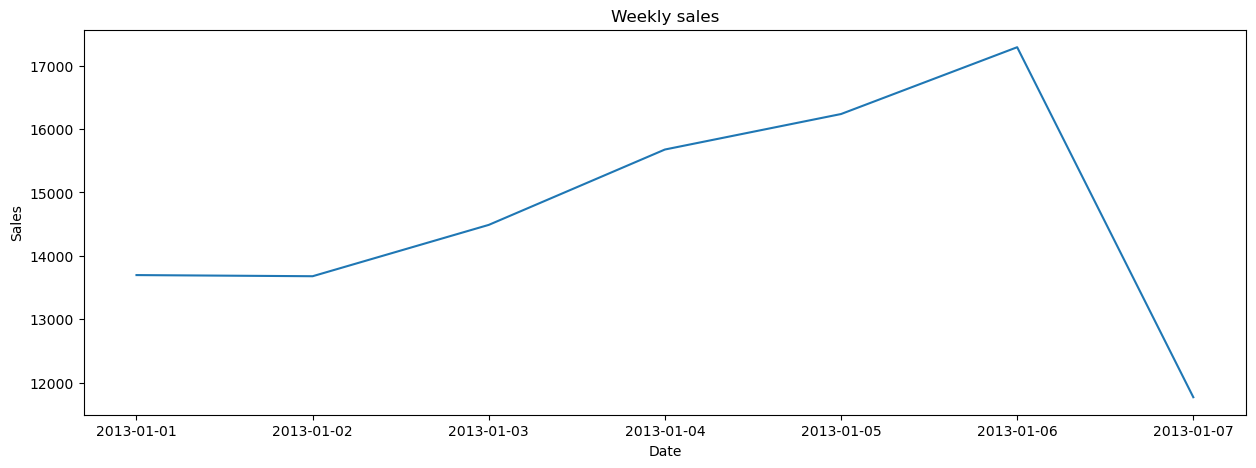

In [11]:
filtered_df=df_1.loc[(df_1.index >= "2013-01-01") & (df_1.index < "2013-01-08")]
plt.figure(figsize=(15, 5))
plt.plot(filtered_df.index, filtered_df['sales'])
plt.title('Weekly sales')
plt.xlabel('Date')
plt.ylabel('Sales')

In [12]:
import datetime

# Define the date as year, month, and day
year = 2013
month = 1
day = 6

# Create a datetime object for the given date
date_object = datetime.datetime(year, month, day)

# Get the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
day_of_week = date_object.weekday()

# Define a list to map the integer representation to the corresponding day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Print the day of the week for the given date
print(days[day_of_week])


Sunday


####we can observe sales are high in sundays.

### PLOTTING MONTHLY SALES

Text(0, 0.5, 'Sales')

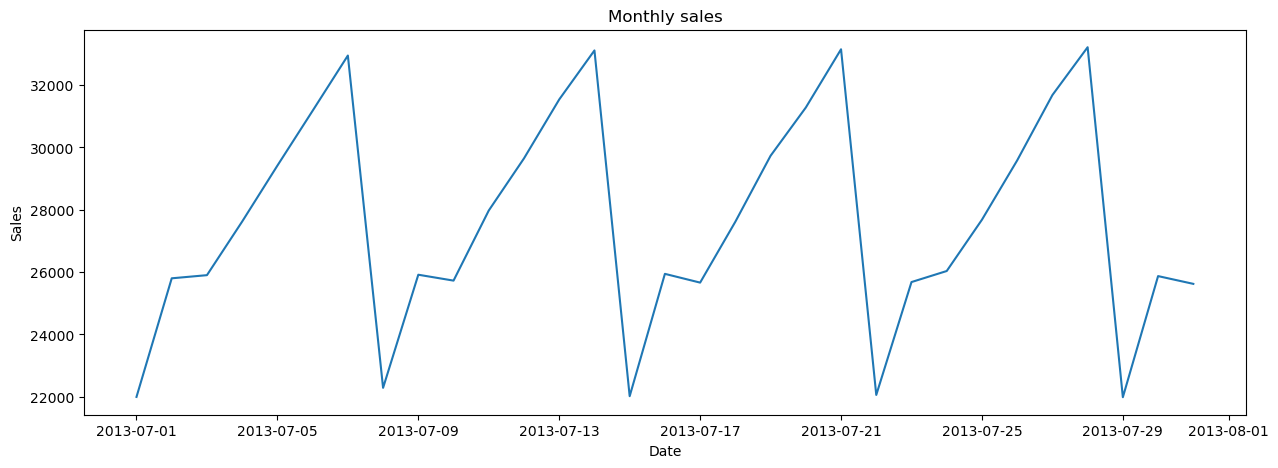

In [13]:
filtered_df=df_1.loc[(df_1.index >= "2013-07-01") & (df_1.index < "2013-08-01")]
plt.figure(figsize=(15, 5))
plt.plot(filtered_df.index, filtered_df['sales'])
plt.title('Monthly sales')
plt.xlabel('Date')
plt.ylabel('Sales')

####we can observe sales are having same pattern for all the weeks in the month.

### PLOTTING SALES IN ITEM LEVEL

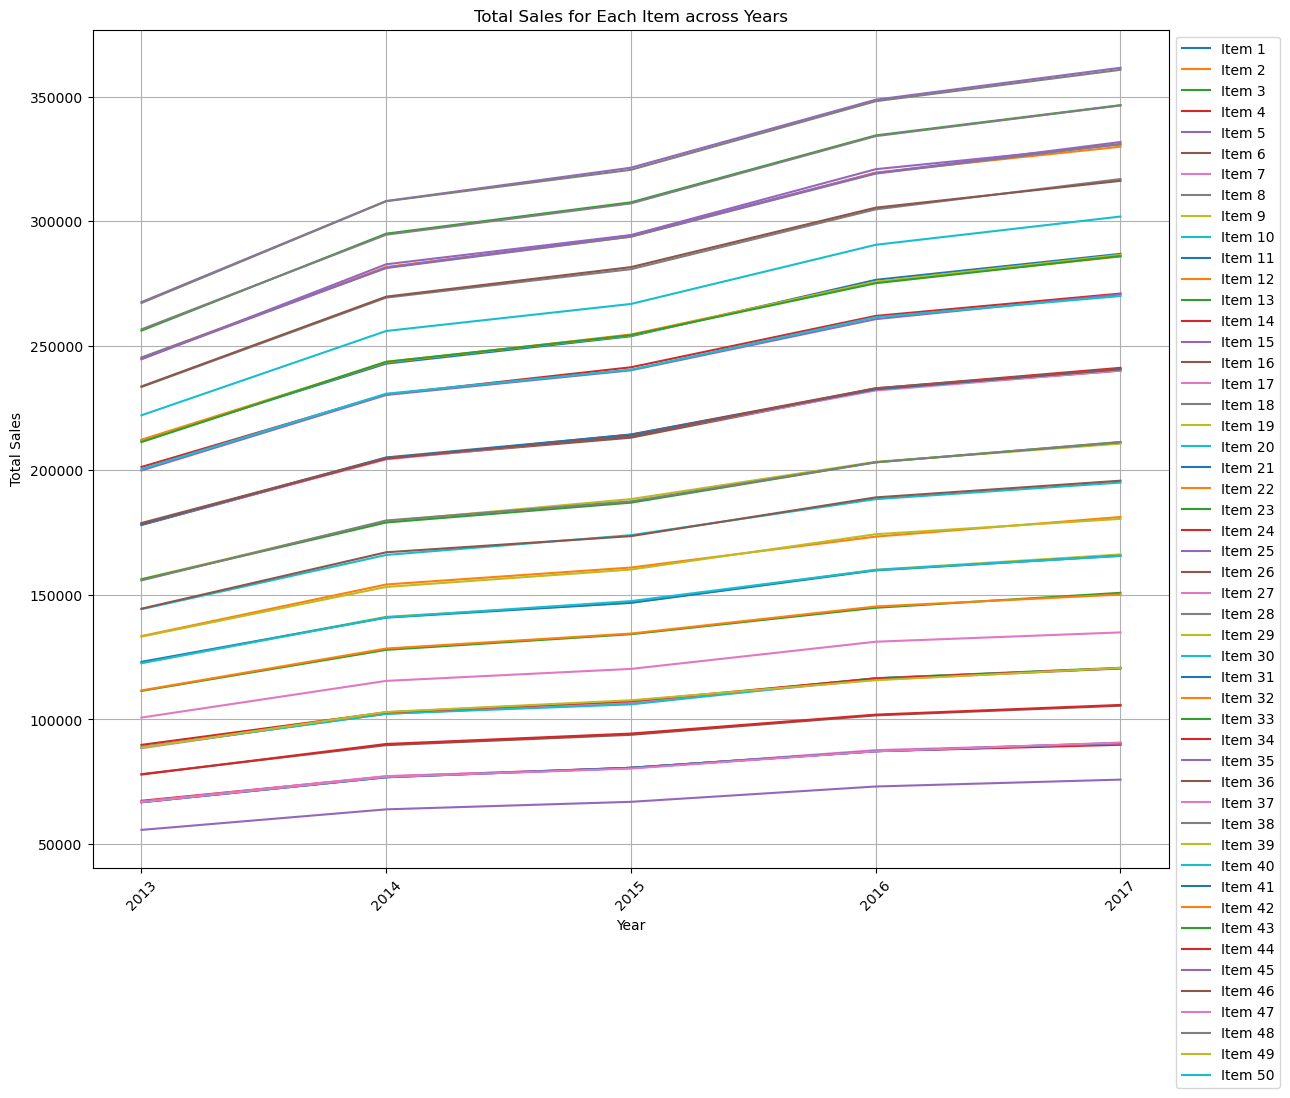

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'date', 'item', and 'sales'

# Step 1: Convert 'date' column to datetime format (if it's not already in datetime format)
df['date'] = pd.to_datetime(df['date'])

# Step 2: Group by 'item' and sum the 'sales' for each item across all years

item_sales_by_year = df.groupby(['item', df['date'].dt.year])['sales'].sum().reset_index()
# Step 3: Create a line plot for each item
plt.figure(figsize=(13, 11))

for item in item_sales_by_year['item'].unique():
    item_data = item_sales_by_year[item_sales_by_year['item'] == item]
    plt.plot(item_data['date'], item_data['sales'], label=f'Item {item}')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Item across Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(item_sales_by_year['date'].unique(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


####we can say  sales are increasing for all the  items over the years. there is no decreasing pattern.

In [15]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named 'df' with columns 'date', 'item', and 'sales'

# Step 1: Convert 'date' column to datetime format (if it's not already in datetime format)
df['date'] = pd.to_datetime(df['date'])

# Step 2: Group by 'item' and sum the 'sales' for each item
item_sales = df.groupby('item')['sales'].sum().reset_index()

# Step 3: Create an interactive line plot using Plotly Express
fig = px.line(item_sales, x='item', y='sales', #color='item', labels={'date': 'Year', 'sales': 'Total Sales'},
              title='Total Sales for Each Item across Years',
              hover_data=['item'], template='plotly_white')

# Step 4: Show the plot with hovering tooltips
fig.show()


####by seeing both the above graph,item no 15 and 28 are the priciest items and item no.5 is the cheapest one.


### PLOTTING ITEM LEVEL SALES ACROSS MONTHS

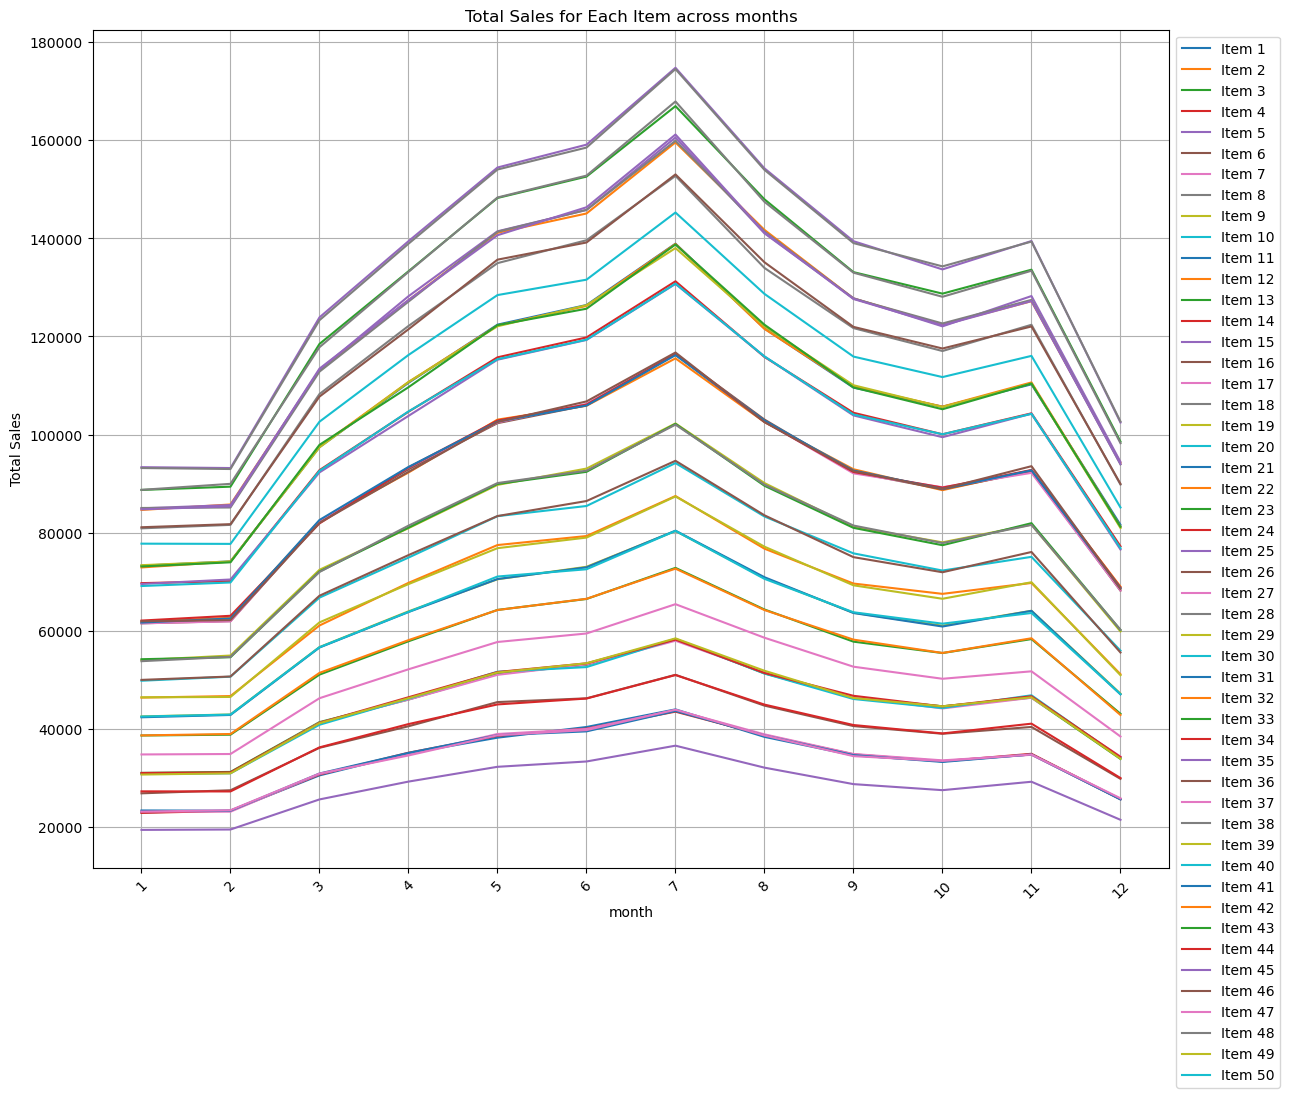

In [17]:
item_sales_by_month = df.groupby(['item', df['date'].dt.month])['sales'].sum().reset_index()
plt.figure(figsize=(13, 11))

for item in item_sales_by_month['item'].unique():
    item_data = item_sales_by_month[item_sales_by_month['item'] == item]
    plt.plot(item_data['date'], item_data['sales'], label=f'Item {item}')

plt.xlabel('month')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Item across months')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(item_sales_by_month['date'].unique(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

we can observe sales are relatively high in july and low in the beginning and ending of the year

### SKEWNESS AND KURTOSIS

In [14]:
from scipy.stats import skew, kurtosis

df['date'] = pd.to_datetime(df['date'])
sales_skewness = skew(df['sales'])
sales_kurtosis = kurtosis(df['sales'])
plt.hist(df["sales"],bins=60)

print("Skewness of 'sales' column:", sales_skewness)
print("Kurtosis of 'sales' column:", sales_kurtosis)


Skewness of 'sales' column: 0.8671108714134627
Kurtosis of 'sales' column: 0.5090611160901317


It seems target is having right skewness (i.e) it is having some outliers but it is valid.
leptokurtic Kurtosis(slightly high tail) confirms presence of seasonality in our target.

# FEATURE ENGINEERING

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [5]:
def create_date_features(df):
    df['month'] = df.date.dt.month
    df['quarter'] = df.date.dt.quarter
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.weekofyear
    df['day_of_week'] = df.date.dt.dayofweek
    df['year'] = df.date.dt.year
    df["is_wknd"] = df.date.dt.weekday // 4
    df['is_month_start'] = df.date.dt.is_month_start.astype(int)
    #df['is_month_end'] = df.date.dt.is_month_end.astype(int)
    return df

df = create_date_features(df)
create_date_features(df)

date  store  item  sales  month  quarter  day_of_month  \
0      2013-01-01      1     1     13      1        1             1   
1      2013-01-02      1     1     11      1        1             2   
2      2013-01-03      1     1     14      1        1             3   
3      2013-01-04      1     1     13      1        1             4   
4      2013-01-05      1     1     10      1        1             5   
...           ...    ...   ...    ...    ...      ...           ...   
912995 2017-12-27     10    50     63     12        4            27   
912996 2017-12-28     10    50     59     12        4            28   
912997 2017-12-29     10    50     74     12        4            29   
912998 2017-12-30     10    50     62     12        4            30   
912999 2017-12-31     10    50     82     12        4            31   

        day_of_year  week_of_year  day_of_week  year  is_wknd  is_month_start  
0                 1             1            1  2013        0               1  
1                 2             1            2  2013        0               0  
2                 3             1            3  2013        0               0  
3                 4             1            4  2013        1               0  
4                 5             1            5  2013        1               0  
...             ...           ...          ...   ...      ...             ...  
912995          361            52            2  2017        0               0  
912996          362            52            3  2017        0               0  
912997          363            52            4  2017        1               0  
912998          364            52            5  2017        1               0  
912999          365            52            6  2017        1               0  

[913000 rows x 13 columns]

In [6]:
df.drop(["store"],axis=1,inplace=True)

In [7]:
df.head()

date  item  sales  month  quarter  day_of_month  day_of_year  \
0 2013-01-01     1     13      1        1             1            1   
1 2013-01-02     1     11      1        1             2            2   
2 2013-01-03     1     14      1        1             3            3   
3 2013-01-04     1     13      1        1             4            4   
4 2013-01-05     1     10      1        1             5            5   

   week_of_year  day_of_week  year  is_wknd  is_month_start  
0             1            1  2013        0               1  
1             1            2  2013        0               0  
2             1            3  2013        0               0  
3             1            4  2013        1               0  
4             1            5  2013        1               0

In [8]:
df["sales_lastMonth"]=df["sales"].shift(+30)
df["sales_2MonthBack"]=df["sales"].shift(+60)
df["sales_3MonthBack"]=df["sales"].shift(+90)

In [9]:
df.head()

date  item  sales  month  quarter  day_of_month  day_of_year  \
0 2013-01-01     1     13      1        1             1            1   
1 2013-01-02     1     11      1        1             2            2   
2 2013-01-03     1     14      1        1             3            3   
3 2013-01-04     1     13      1        1             4            4   
4 2013-01-05     1     10      1        1             5            5   

   week_of_year  day_of_week  year  is_wknd  is_month_start  sales_lastMonth  \
0             1            1  2013        0               1              NaN   
1             1            2  2013        0               0              NaN   
2             1            3  2013        0               0              NaN   
3             1            4  2013        1               0              NaN   
4             1            5  2013        1               0              NaN   

   sales_2MonthBack  sales_3MonthBack  
0               NaN               NaN  
1               NaN               NaN  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912910 entries, 90 to 912999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              912910 non-null  datetime64[ns]
 1   item              912910 non-null  int64         
 2   sales             912910 non-null  int64         
 3   month             912910 non-null  int64         
 4   quarter           912910 non-null  int64         
 5   day_of_month      912910 non-null  int64         
 6   day_of_year       912910 non-null  int64         
 7   week_of_year      912910 non-null  int64         
 8   day_of_week       912910 non-null  int64         
 9   year              912910 non-null  int64         
 10  is_wknd           912910 non-null  int64         
 11  is_month_start    912910 non-null  int64         
 12  sales_lastMonth   912910 non-null  float64       
 13  sales_2MonthBack  912910 non-null  float64       
 14  sal

# SPLITTING THE DATA

In [12]:
X = df.drop(['sales',"date"], axis=1)
y = df['sales']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# MODEL TRAINING

In [13]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
#import xgboost as xgb
import xgboost as xgb

In [34]:
from datetime import timedelta
import pandas as pd
#from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split

def forecast_item_sales(item_data, forecast_period=90):

    X = item_data.drop(['sales', "date"], axis=1)
    y = item_data['sales']

    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

    # Train the Random Forest Regressor
    model = xgb.XGBRegressor()
    rf = model.fit(x_train, y_train)

    # Forecast sales for the next 90 days
    last_date = item_data['date'].max()
    forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_period + 1)]
    forecast_features = pd.DataFrame({'item': [item_data['item'].iloc[0]] * forecast_period,
                                      'month': [date.month for date in forecast_dates],
                                      'quarter': [date.quarter for date in forecast_dates],
                                      'day_of_month': [date.day for date in forecast_dates],
                                      'day_of_year': [date.dayofyear for date in forecast_dates],
                                      'week_of_year': [date.weekofyear for date in forecast_dates],
                                      'day_of_week': [date.dayofweek for date in forecast_dates],
                                      'year': [date.year for date in forecast_dates],
                                      'is_wknd': [date.weekday() // 4 for date in forecast_dates],
                                      'is_month_start': [date.is_month_start for date in forecast_dates],
                                      #'is_month_end': [date.is_month_end for date in forecast_dates],
                                      'sales_lastMonth': [item_data['sales'].iloc[-30] if date <= last_date - timedelta(days=30) else item_data["sales"].mean() for date in forecast_dates],
                                      'sales_2MonthBack': [item_data['sales'].iloc[-60] if date <= last_date - timedelta(days=60) else  item_data["sales"].mean() for date in forecast_dates],
                                      'sales_3MonthBack': [item_data['sales'].iloc[-90] if date <= last_date - timedelta(days=90) else item_data["sales"].mean() for date in forecast_dates]})

    forecast_sales = rf.predict(forecast_features)
    forecast_sales = np.round(forecast_sales).astype(int)
    y_pred = rf.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    accuracy=r2_score(y_test,y_pred) # Predict on the training data (for evaluation)
    #score = # Calculate the evaluation metric (e.g., MSE) for y_pred and y

    return forecast_dates, forecast_sales,mse,accuracy


In [41]:
item_forecasts_total = {}
item_forecasts = {}
mse_total=[]
r2_score_total=[]
for item in df['item'].unique():
    item_data = df[df['item'] == item]
#item_data,item_data.info()
    forecast_dates, forecast_sales,mse,accuracy = forecast_item_sales(item_data)
    item_forecasts[item] = forecast_sales
    item_forecasts_total[item]= forecast_sales.sum()
    mse_total.append(mse)
    r2_score_total.append(accuracy)
# Print the forecast for the first item as an example

    actual_sales = item_data['sales'].values[-len(forecast_sales):]
    print(f"Item {item} Forecast Accuracy:")
    print(f"MSE: {mse:.2f}")
    print(f"R2_SCORE:{accuracy}")

overall_mse = np.mean(mse_total)
overall_r2_score = np.mean(r2_score_total)

print(f"Overall Model Metrics:")
print(f"Overall MSE: {overall_mse:.2f}")
print(f"Overall R2 Score: {overall_r2_score:.2f}")


Item 1 Forecast Accuracy:
MSE: 31.49
R2_SCORE:0.5539109218195568
Item 2 Forecast Accuracy:
MSE: 87.26
R2_SCORE:0.7841340509266821
Item 3 Forecast Accuracy:
MSE: 53.60
R2_SCORE:0.6908504214288603
Item 4 Forecast Accuracy:
MSE: 30.27
R2_SCORE:0.5629442715947653
Item 5 Forecast Accuracy:
MSE: 25.91
R2_SCORE:0.5068009895386767
Item 6 Forecast Accuracy:
MSE: 89.21
R2_SCORE:0.7815959728969322
Item 7 Forecast Accuracy:
MSE: 90.27
R2_SCORE:0.7778776503517959
Item 8 Forecast Accuracy:
MSE: 120.57
R2_SCORE:0.8221019425200919
Item 9 Forecast Accuracy:
MSE: 76.60
R2_SCORE:0.7554378524390708
Item 10 Forecast Accuracy:
MSE: 110.80
R2_SCORE:0.8196554014945617
Item 11 Forecast Accuracy:
MSE: 108.12
R2_SCORE:0.805278545667815
Item 12 Forecast Accuracy:
MSE: 110.08
R2_SCORE:0.8048809096986415
Item 13 Forecast Accuracy:
MSE: 132.75
R2_SCORE:0.8350964801780953
Item 14 Forecast Accuracy:
MSE: 89.29
R2_SCORE:0.7786037663376562
Item 15 Forecast Accuracy:
MSE: 137.10
R2_SCORE:0.843026078763657
Item 16 Forecas

### we got accuracy of 0.79

In [20]:
print("Total forecast for each item in next 90 days are:")
for item,sales in item_forecasts_total.items():
    print(f"for item{item}, sales will be {sales}")

Total forecast for each item in next 90 days are:
for item1, sales will be 2020
for item2, sales will be 5481
for item3, sales will be 3228
for item4, sales will be 1913
for item5, sales will be 1567
for item6, sales will be 5359
for item7, sales will be 5590
for item8, sales will be 7016
for item9, sales will be 4630
for item10, sales will be 6774
for item11, sales will be 6463
for item12, sales will be 6325
for item13, sales will be 7905
for item14, sales will be 5545
for item15, sales will be 8300
for item16, sales will be 2353
for item17, sales will be 3016
for item18, sales will be 7727
for item19, sales will be 3668
for item20, sales will be 4417
for item21, sales will be 3686
for item22, sales will be 7653
for item23, sales will be 2602
for item24, sales will be 5954
for item25, sales will be 7854
for item26, sales will be 4293
for item27, sales will be 1910
for item28, sales will be 8425
for item29, sales will be 6340
for item30, sales will be 3780
for item31, sales will be 542

In [21]:
for item, forecast_sales in item_forecasts.items():
    print(f"Item {item} Sales Forecast for the next 90 days:")
    for date, sales in zip(forecast_dates, forecast_sales):
        print(f"{date.strftime('%Y-%m-%d')}: {sales}")


Item 1 Sales Forecast for the next 90 days:
2018-01-01: 17
2018-01-02: 16
2018-01-03: 18
2018-01-04: 19
2018-01-05: 22
2018-01-06: 25
2018-01-07: 26
2018-01-08: 16
2018-01-09: 16
2018-01-10: 18
2018-01-11: 20
2018-01-12: 21
2018-01-13: 23
2018-01-14: 26
2018-01-15: 16
2018-01-16: 16
2018-01-17: 18
2018-01-18: 18
2018-01-19: 21
2018-01-20: 22
2018-01-21: 23
2018-01-22: 16
2018-01-23: 16
2018-01-24: 17
2018-01-25: 18
2018-01-26: 20
2018-01-27: 20
2018-01-28: 21
2018-01-29: 17
2018-01-30: 17
2018-01-31: 18
2018-02-01: 21
2018-02-02: 22
2018-02-03: 24
2018-02-04: 26
2018-02-05: 18
2018-02-06: 18
2018-02-07: 22
2018-02-08: 23
2018-02-09: 25
2018-02-10: 25
2018-02-11: 26
2018-02-12: 16
2018-02-13: 17
2018-02-14: 21
2018-02-15: 21
2018-02-16: 23
2018-02-17: 23
2018-02-18: 24
2018-02-19: 17
2018-02-20: 17
2018-02-21: 19
2018-02-22: 20
2018-02-23: 24
2018-02-24: 25
2018-02-25: 26
2018-02-26: 18
2018-02-27: 18
2018-02-28: 22
2018-03-01: 25
2018-03-02: 30
2018-03-03: 31
2018-03-04: 32
2018-03-05:

In [22]:
print("Item 1 Sales Forecast for the next 90 days:")
for date, sales in zip(forecast_dates, item_forecasts[1]):
    print(f"{date.strftime('%Y-%m-%d')}: {sales}")


Item 1 Sales Forecast for the next 90 days:
2018-01-01: 17
2018-01-02: 16
2018-01-03: 18
2018-01-04: 19
2018-01-05: 22
2018-01-06: 25
2018-01-07: 26
2018-01-08: 16
2018-01-09: 16
2018-01-10: 18
2018-01-11: 20
2018-01-12: 21
2018-01-13: 23
2018-01-14: 26
2018-01-15: 16
2018-01-16: 16
2018-01-17: 18
2018-01-18: 18
2018-01-19: 21
2018-01-20: 22
2018-01-21: 23
2018-01-22: 16
2018-01-23: 16
2018-01-24: 17
2018-01-25: 18
2018-01-26: 20
2018-01-27: 20
2018-01-28: 21
2018-01-29: 17
2018-01-30: 17
2018-01-31: 18
2018-02-01: 21
2018-02-02: 22
2018-02-03: 24
2018-02-04: 26
2018-02-05: 18
2018-02-06: 18
2018-02-07: 22
2018-02-08: 23
2018-02-09: 25
2018-02-10: 25
2018-02-11: 26
2018-02-12: 16
2018-02-13: 17
2018-02-14: 21
2018-02-15: 21
2018-02-16: 23
2018-02-17: 23
2018-02-18: 24
2018-02-19: 17
2018-02-20: 17
2018-02-21: 19
2018-02-22: 20
2018-02-23: 24
2018-02-24: 25
2018-02-25: 26
2018-02-26: 18
2018-02-27: 18
2018-02-28: 22
2018-03-01: 25
2018-03-02: 30
2018-03-03: 31
2018-03-04: 32
2018-03-05:

KeyError: ignored

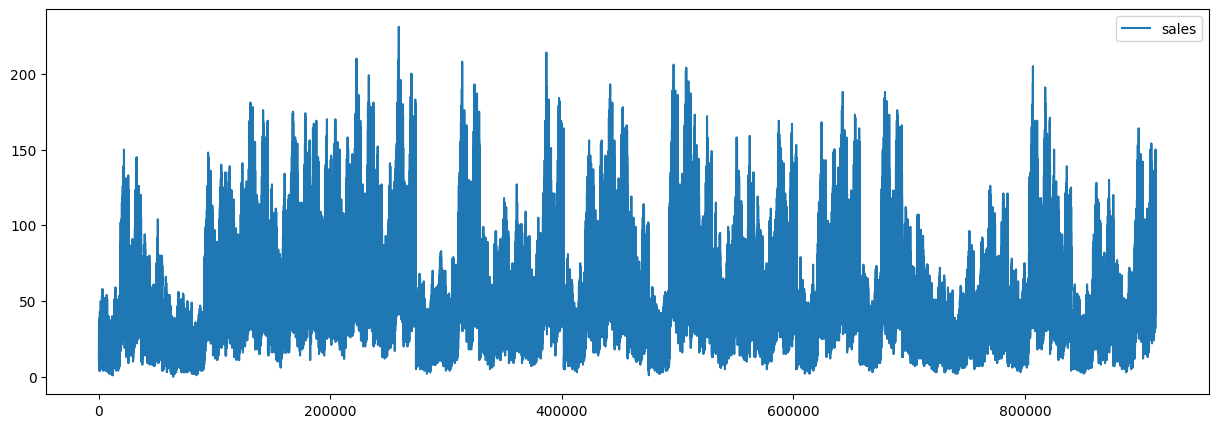

In [101]:
ax = df[['sales']].plot(figsize=(15, 5))
df['y_pred'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
test["prediction_rf"]=rf.predict(x_test)
df = df.merge(test[['prediction_lr']], how='left', left_index=True, right_index=True)
ax = df[['sales']].plot(figsize=(15, 5))
df['prediction_lr'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

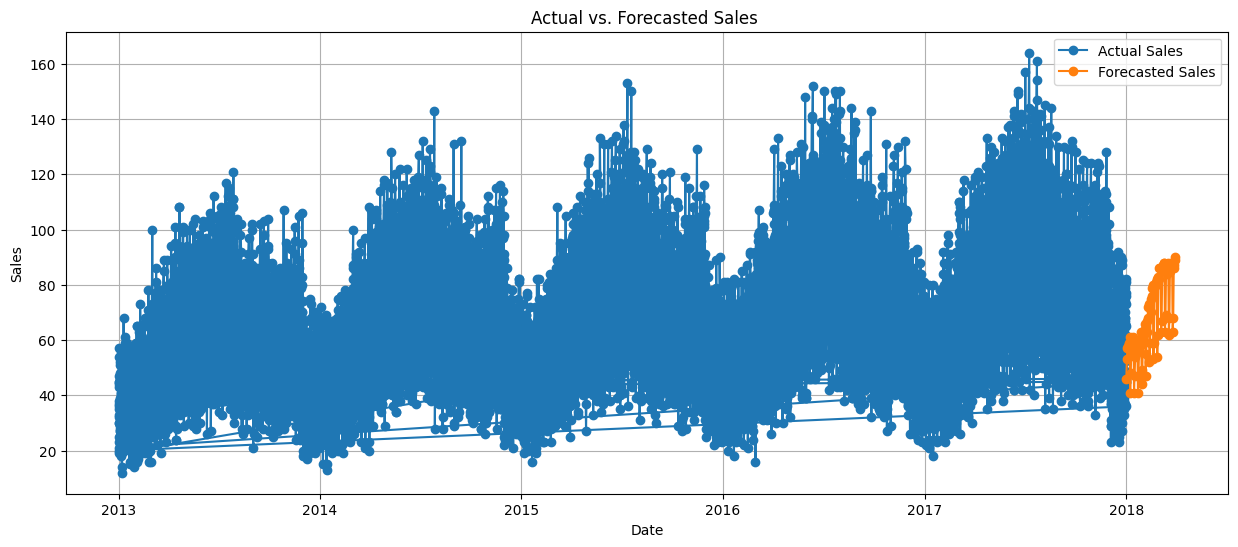

In [96]:
plt.figure(figsize=(15, 6))
plt.plot(item_data['date'], item_data['sales'], label='Actual Sales', marker='o')
plt.plot(forecast_dates, forecast_sales, label='Forecasted Sales', marker='o')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f"Actual vs. Forecasted Sales ")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
from datetime import timedelta
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV

def forecast_item_sales1(item_data, forecast_period=90):

    X = item_data.drop(['sales', "date"], axis=1)
    y = item_data['sales']

    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

    param_grid = {
        'n_estimators': [150],
        'max_depth': [15]
        #'min_samples_split': [10]
    }

    # Train the XGB Regressor
    model = xgb.XGBRegressor()
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X, y)

    # Use the best model found during hyperparameter tuning
    best_model = grid_search.best_estimator_


    #rf = model.fit(x_train, y_train)

    # Forecast sales for the next 90 days
    last_date = item_data['date'].max()
    forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_period + 1)]
    forecast_features = pd.DataFrame({'item': [item_data['item'].iloc[0]] * forecast_period,
                                      'month': [date.month for date in forecast_dates],
                                      'quarter': [date.quarter for date in forecast_dates],
                                      'day_of_month': [date.day for date in forecast_dates],
                                      'day_of_year': [date.dayofyear for date in forecast_dates],
                                      'week_of_year': [date.weekofyear for date in forecast_dates],
                                      'day_of_week': [date.dayofweek for date in forecast_dates],
                                      'year': [date.year for date in forecast_dates],
                                      'is_wknd': [date.weekday() // 4 for date in forecast_dates],
                                      'is_month_start': [date.is_month_start for date in forecast_dates],
                                      #'is_month_end': [date.is_month_end for date in forecast_dates],
                                      'sales_lastMonth': [item_data['sales'].iloc[-30] if date <= last_date - timedelta(days=30) else item_data["sales"].mean() for date in forecast_dates],
                                      'sales_2MonthBack': [item_data['sales'].iloc[-60] if date <= last_date - timedelta(days=60) else  item_data["sales"].mean() for date in forecast_dates],
                                      'sales_3MonthBack': [item_data['sales'].iloc[-90] if date <= last_date - timedelta(days=90) else item_data["sales"].mean() for date in forecast_dates]})

    forecast_sales = best_model.predict(forecast_features)
    forecast_sales = np.round(forecast_sales).astype(int)
    y_pred = best_model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    accuracy=r2_score(y_test,y_pred) # Predict on the training data (for evaluation)
    #score = # Calculate the evaluation metric (e.g., MSE) for y_pred and y
  
    
        
    return forecast_dates, forecast_sales,mse,accuracy,best_model


In [23]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
import pickle

In [27]:
import warnings
warnings.filterwarnings("ignore")

item_forecasts_total_rf = {}
item_forecasts_rf = {}
mse_total_rf=[]
r2_score_total_rf=[]
for item in df['item'].unique():
    item_data = df[df['item'] == item]
#item_data,item_data.info()
    forecast_dates, forecast_sales,mse,accuracy,best_model = forecast_item_sales1(item_data)
    item_forecasts_rf[item] = forecast_sales
    item_forecasts_total_rf[item]= forecast_sales.sum()
    mse_total_rf.append(mse)
    r2_score_total_rf.append(accuracy)
    with open(f'sales_forecast_model{item}.pkl', 'wb') as file:
         pickle.dump(best_model, file)
# Print the forecast for the first item as an example

    actual_sales = item_data['sales'].values[-len(forecast_sales):]
    print(best_model)
    print(f"Item {item} Forecast Accuracy:")
    print(f"MSE: {mse:.2f}")
    print(f"R2_SCORE:{accuracy}")

overall_mse = np.mean(mse_total_rf)
overall_r2_score = np.mean(r2_score_total_rf)

print(f"Overall Model Metrics:")
print(f"Overall MSE: {overall_mse:.2f}")
print(f"Overall R2 Score: {overall_r2_score:.2f}")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Item 1 Forecast Accuracy:
MSE: 0.05
R2_SCORE:0.9993040334004163
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             

In [29]:
X = df.drop(['sales', "date"], axis=1)
y = df['sales']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#for depth in [8,9,10,12,15,20]:
rf = xgb.XGBRegressor(max_depth = depth)
rf.fit(x_train, y_train)
train_score = rf.score(x_train, y_train)
cross_val_result = np.mean(cross_val_score(rf, x_train, y_train, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 8, training score : 0.8701139615935636 and cross-val score : 0.8696396271276381
Depth : 9, training score : 0.8806643772363971 and cross-val score : 0.8797787389004534
Depth : 10, training score : 0.8894325382305159 and cross-val score : 0.8878233048773714
Depth : 12, training score : 0.9051244378860966 and cross-val score : 0.9003852799389309
Depth : 15, training score : 0.9246186661237115 and cross-val score : 0.9078930913467396
Depth : 20, training score : 0.9625218456753921 and cross-val score : 0.9075620593793374


### saving the trained model